## 2.0 Atlantic Articles EDA and Cleaning

This notebook contains some initial exploratory analysis of the data scraped from the Atlantic using 1.0_atlantic_scraper.ipynb. After exploring article topic trends and distributions within the data, the data is also cleaned in preparation for analysis using NLP techniques.

In [1]:
import os
import pickle as pkl
from datetime import date
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize 
nltk.download('punkt')
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords 
nltk.download('stopwords') 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Functions used:

In [2]:
def get_year(my_date):
    """Return year from datetime object"""
    return my_date.year

In [3]:
def is_weekday(my_date):
    """Return 0 or 1 based on whether a date is a weekday or not...0 is not, 1 is"""
    weekday = '?'
    day_of_week = my_date.weekday()
    if day_of_week < 5:
        weekday = 1
    else:
        weekday = 0
    return weekday        

Loading pkl files and creating a DataFrame

In [4]:
dict_list = []
file_list = os.listdir('data/raw')
for file in file_list:
    if file[-4:] == '.pkl':
        with open ('data/raw/{}'.format(file), 'rb') as fp: #reading binary
            data = pkl.load(fp)
            dict_list.append(data)
            
master_dict = {key:[] for key in dict_list[0].keys()}

for date_dict in dict_list:
    for key, val in date_dict.items():
        master_dict[key] += val

In [5]:
df = pd.DataFrame(master_dict)
df.shape

(29990, 9)

In [6]:
df['year'] = df['date'].agg(get_year)

In [7]:
df.shape

(29990, 10)

In [8]:
df.head()

,date,category,title,subtitle,author,author_bio,text,url,time_scraped,year
0,2016-04-01,Daily,"The Atlantic Daily: March Jobs Report, Chicago...","The U.S. economy adds a modest 215,000 jobs, t...",Matt Ford and Rosa Inocencio Smith,Matt Ford is a former associate editor at The ...,What We’re Following: Marching Toward JobsThe...,https://www.theatlantic.com/newsletters/archiv...,2020-09-29 18:43:20.697674,2016
1,2016-04-01,Politics Daily,The Edge: In Like a Lion and Out With Jobs,?,Elaine Godfrey,Elaine Godfrey is a staff writer at The Atlant...,Today in One ParagraphPresident Obama advised...,https://www.theatlantic.com/politics/archive/2...,2020-09-29 18:43:37.002516,2016
2,2016-04-01,Global,Hacking Elections in Latin America and Rapping...,The highlights from seven days of reading abou...,Jillian Kumagai,Jillian Kumagai is a former editorial fellow a...,The French Connection\r\nWilliam McCants and ...,https://www.theatlantic.com/international/arch...,2020-09-29 18:43:44.801143,2016
3,2016-04-01,Politics,Bernie in the Bronx,Can Sanders stun Hillary Clinton in the state ...,Russell Berman,Russell Berman is a staff writer at The Atlant...,"BRONX, New York—Mercer Jabul sat quietly at t...",https://www.theatlantic.com/politics/archive/2...,2020-09-29 18:43:52.166631,2016
4,2016-04-01,Global,Pitching Global Stories: A Freelancer’s Guide,"Send us your smart, original stories about wha...",The Editors,?,The Atlantic’s global coverage is driven by c...,https://www.theatlantic.com/international/arch...,2020-09-29 18:44:00.005706,2016


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29990 entries, 0 to 29989
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          29990 non-null  datetime64[ns]
 1   category      29990 non-null  object        
 2   title         29990 non-null  object        
 3   subtitle      29990 non-null  object        
 4   author        29990 non-null  object        
 5   author_bio    29990 non-null  object        
 6   text          29990 non-null  object        
 7   url           29990 non-null  object        
 8   time_scraped  29990 non-null  datetime64[ns]
 9   year          29990 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(7)
memory usage: 2.3+ MB


#### Time for some EDA etc.

Actually, first I want to replace anything with '?' with NaN

In [10]:
df.replace('?', np.nan, inplace=True)
df.replace('', np.nan, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29990 entries, 0 to 29989
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          29990 non-null  datetime64[ns]
 1   category      29465 non-null  object        
 2   title         29990 non-null  object        
 3   subtitle      29950 non-null  object        
 4   author        29730 non-null  object        
 5   author_bio    29429 non-null  object        
 6   text          29931 non-null  object        
 7   url           29990 non-null  object        
 8   time_scraped  29990 non-null  datetime64[ns]
 9   year          29990 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(7)
memory usage: 2.3+ MB


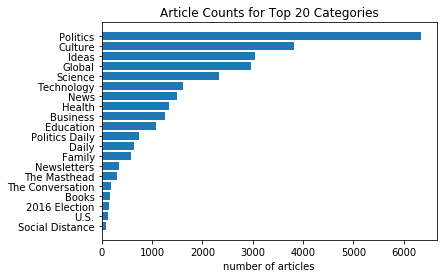

In [12]:
df_cat = df['category'].value_counts().reset_index()
df_cat_sorted = df_cat.sort_values('category')
plt.barh(df_cat_sorted['index'][-20:], df_cat_sorted['category'][-20:])
plt.title('Article Counts for Top 20 Categories')
plt.xlabel('number of articles')
plt.show()

Top categories by year...

In [13]:
top_10 = {
    
} 

years = [2016, 2017, 2018, 2019, 2020]

for year in years:    
    df_year = df[df['year'] == year]
    top10_year = dict(df_year['category'].value_counts()[:10])

    for key, val in top10_year.items():
        if key not in top_10:
            top_10[key] = {year: val}
        else:
            if year not in top_10[key]:
                top_10[key][year] = val   

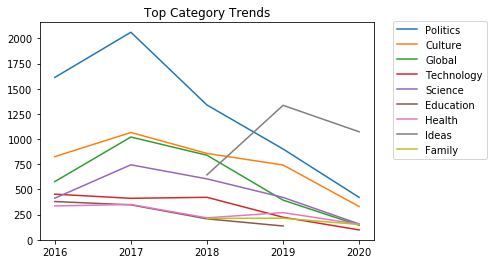

In [14]:
years = [2016, 2017, 2018, 2019, 2020]
for category, val in top_10.items():
    year = [inner_key for inner_key, val in top_10[category].items()]
    num = [val for inner_key, val in top_10[category].items()]
    if len(year) > 2:
        plt.plot(year, num, label=str(category))

plt.xticks([2016, 2017, 2018, 2019, 2020])
plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1.03))
plt.title('Top Category Trends')
plt.show()

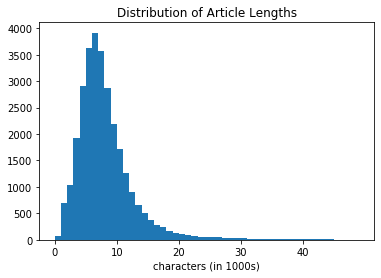

Length of longest article: 210770 characters
Length of shortest article: 208 characters


In [15]:
df_text = df[df['text'].isna() == 0]
MAX_VAL = 50000
INCREMENT = 10000
SCALING = 1000
plt.hist(df_text['text'].apply(len), bins=range(0, MAX_VAL, 1000))
plt.title('Distribution of Article Lengths')
plt.xlabel('characters (in {}s)'.format(SCALING))
plt.xticks(list(range(0, MAX_VAL, INCREMENT)), list(range(0, int(MAX_VAL/SCALING), int(INCREMENT/SCALING))))
plt.show()


shortest = df_text['text'].apply(len).min()
longest = df_text['text'].apply(len).max()
print('Length of longest article: {} characters'.format(longest))
print('Length of shortest article: {} characters'.format(shortest))

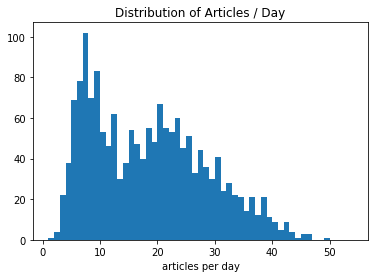

Number of articles per day
min: 1
max: 55
average: 18.01201201201201
median: 17.0


In [16]:
df_art = df['date'].value_counts().reset_index()
plt.hist(df_art['date'], bins=range(min(df_art['date']), max(df_art['date'])))
plt.xlabel('articles per day')
plt.title('Distribution of Articles / Day')
plt.show()

print('Number of articles per day')
max_art = df_art['date'].max()
min_art = df_art['date'].min()
print('min: {}'.format(min_art))
print('max: {}'.format(max_art))
avg = df_art['date'].mean()
median = df_art['date'].median()
print('average: {}'.format(avg))
print('median: {}'.format(median))

Checking whether this double curve may be due to the day of the week or the year:

In [17]:
df_art['year'] = df_art['index'].agg(get_year)
df_art['weekday'] = df_art['index'].agg(is_weekday)

In [18]:
df_art['weekday'].value_counts()

1    1189
0     476
Name: weekday, dtype: int64

In [19]:
df_weekday = df_art[df_art['weekday'] == 1]
df_weekend = df_art[df_art['weekday'] == 0]

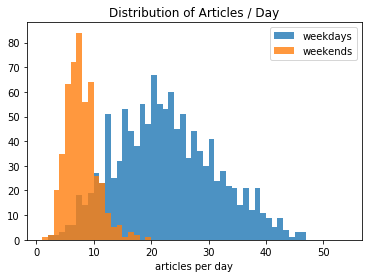

In [20]:
plt.hist(
    df_weekday['date'], bins=range(min(df_weekday['date']), max(df_weekday['date'])), 
    label='weekdays', alpha=0.8
)
plt.hist(
    df_weekend['date'], bins=range(min(df_weekend['date']), max(df_weekend['date'])), 
    label='weekends', alpha=0.8
)
plt.xlabel('articles per day')
plt.title('Distribution of Articles / Day')
plt.legend()
plt.show()

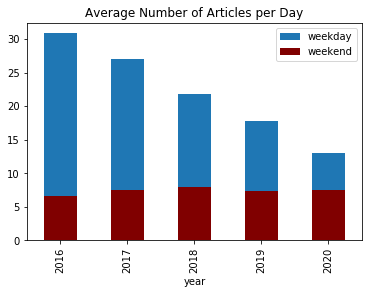

In [21]:
df_weekday.groupby('year')['date'].mean().plot(kind='bar', label='weekday')
df_weekend.groupby('year')['date'].mean().plot(kind='bar', label='weekend', color='maroon')
plt.legend()
plt.title('Average Number of Articles per Day')
plt.show()

Are they employing fewer people?

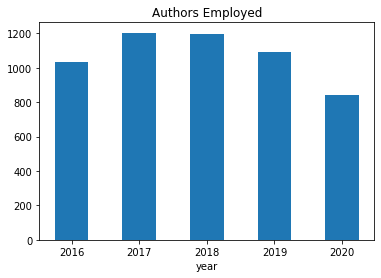

In [49]:
y_a = dict(df.groupby('year')['author'].unique())
years = [2016, 2017, 2018, 2019, 2020]    
nums = [len(y_a[year]) for year in years]
plt.bar(years, nums, width=0.5)
plt.title('Authors Employed')
plt.xlabel('year')
plt.show()

An article:

In [230]:
df['text'][0]

' What We’re Following: Marching Toward JobsThe U.S. economy added a modest 215,000 jobs in March as the unemployment rate ticked upwards slightly to 5 percent, according to a Labor Department report Friday. Economists expect both wages and labor-force participation to climb as 2016 progresses.Second City Strike: Thousands of Chicago teachers went on a one-day strike Friday, grinding the third-largest school system in the country to a halt. Union officials launched the protest to urge Illinois Governor Bruce Rauner, a Republican, and his Democratic opponents to resolve a nine-month standoff over the state budget.Battery Included: Tesla Motors received over 115,000 preorders for its new Model 3 after CEO Elon Musk unveiled it on Thursday night, but customers have a long wait ahead: The first deliveries of the battery-powered sedan won’t be made until late 2017.SnapshotA man takes a picture of cherry blossoms in almost-full bloom in Tokyo, Japan, on April 1, 2016. See more of the week’s 

#### Cleaning the text

In [24]:
df_clean = df[df['text'].isna() == 0]
df_clean.shape

(29931, 10)

In [25]:
articles_lower = df_clean['text'].str.lower()

In [26]:
#articles_lower[0]

In [27]:
articles_lower = articles_lower.str.replace('\r', ' ')
articles_lower = articles_lower.str.replace('\n', ' ')
articles_lower = articles_lower.str.replace('|', '')

In [38]:
#articles_lower[0]

In [29]:
articles_tokenized = articles_lower.apply(lambda x: word_tokenize(x))

In [30]:
#articles_tokenized[0]

In [31]:
stemmer = PorterStemmer()
articles_stemmed = articles_tokenized.apply(
    lambda article: [stemmer.stem(word) for word in article]
)

In [32]:
#articles_stemmed[0]

In [33]:
stopwords_set = set(stopwords.words('english')) 
articles_cleaned = articles_stemmed.apply(
    lambda article: [word for word in article if word not in stopwords_set]
)

In [34]:
articles_cleaned = articles_cleaned.apply(
    lambda article: [word for word in article if word.isalpha()]
)

In [35]:
df_clean['cleaned_text'] = articles_cleaned.apply(lambda x: ' '.join(x))
df_clean.head()

C:\Users\Owner\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,category,title,subtitle,author,author_bio,text,url,time_scraped,year,cleaned_text
0,2016-04-01,Daily,"The Atlantic Daily: March Jobs Report, Chicago...","The U.S. economy adds a modest 215,000 jobs, t...",Matt Ford and Rosa Inocencio Smith,Matt Ford is a former associate editor at The ...,What We’re Following: Marching Toward JobsThe...,https://www.theatlantic.com/newsletters/archiv...,2020-09-29 18:43:20.697674,2016,follow march toward jobsth economi ad modest j...
1,2016-04-01,Politics Daily,The Edge: In Like a Lion and Out With Jobs,NaN,Elaine Godfrey,Elaine Godfrey is a staff writer at The Atlant...,Today in One ParagraphPresident Obama advised...,https://www.theatlantic.com/politics/archive/2...,2020-09-29 18:43:37.002516,2016,today one paragraphpresid obama advis world le...
2,2016-04-01,Global,Hacking Elections in Latin America and Rapping...,The highlights from seven days of reading abou...,Jillian Kumagai,Jillian Kumagai is a former editorial fellow a...,The French Connection\r\nWilliam McCants and ...,https://www.theatlantic.com/international/arch...,2020-09-29 18:43:44.801143,2016,french connect william mccant christoph mesero...
3,2016-04-01,Politics,Bernie in the Bronx,Can Sanders stun Hillary Clinton in the state ...,Russell Berman,Russell Berman is a staff writer at The Atlant...,"BRONX, New York—Mercer Jabul sat quietly at t...",https://www.theatlantic.com/politics/archive/2...,2020-09-29 18:43:52.166631,2016,bronx new jabul sat quietli veri top hill mari...
4,2016-04-01,Global,Pitching Global Stories: A Freelancer’s Guide,"Send us your smart, original stories about wha...",The Editors,NaN,The Atlantic’s global coverage is driven by c...,https://www.theatlantic.com/international/arch...,2020-09-29 18:44:00.005706,2016,atlant global coverag driven curios world forc...


In [36]:
df_clean.to_pickle('data/atlantic_data.pkl')

In [37]:
df_clean.shape

(29931, 11)

The cleaned data will be used for sentiment analysis in 3.0_atlantic_sentiment_analysis.ipynb. 